# This example shows how to create a bunch from the Twiss parameters

In [1]:
%plot -f SVG

In [2]:
RF_Track;


RF-Track, version 2.2.3

Copyright (C) 2016-2024 CERN, Geneva, Switzerland. All rights reserved.

Author and contact:
 Andrea Latina <andrea.latina@cern.ch>
 BE-ABP Group
 CERN
 CH-1211 GENEVA 23
 SWITZERLAND

This software is distributed under a CERN proprietary software
license in the hope that it will be useful, but WITHOUT ANY WARRANTY;
not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

See the COPYRIGHT and LICENSE files at the top-level directory of
the RF-Track download area: https://gitlab.cern.ch/rf-track/download

RF-Track was compiled with GSL-2.7 and fftw-3.3.10



## Single-particle parameters

In [3]:
%% Single-particle parameters
mass = RF_Track.electronmass; % MeV/c^2
P = 100; % MeV/c
Q = -1; % e+

## Specifying the Twiss parameters

In [4]:
%% Bunch
Nparticles = 5000;

Twiss = Bunch6d_twiss();
Twiss.emitt_x = 10; % mm.mrad normalised emittance
Twiss.emitt_y = 10; % mm.mrad
Twiss.beta_x = 5; % m
Twiss.beta_y = 3; % m
Twiss.alpha_x = 0.5;
Twiss.alpha_y = -0.5;

B0 = Bunch6d (mass, 0.0, Q, P, Twiss, Nparticles);

### Let's plot the phase space

ans =

          0          0          0          0          0   100.0000
     0.0602    -0.0161    -0.6975    -0.4275          0   100.0000
     0.8431    -0.0109     0.2591    -0.0765          0   100.0000
     0.4991    -0.1809    -0.5381     0.0341          0   100.0000
    -1.2260     0.0524     0.4222     0.3152          0   100.0000
    -0.0278     0.0925    -0.1666    -0.0654          0   100.0000
    -0.0169    -0.1312     0.1022     0.0494          0   100.0000
    -0.3474     0.0521    -0.2557    -0.1126          0   100.0000
     0.4145    -0.0983    -0.3212    -0.0029          0   100.0000
    -0.3322     0.0328    -0.4595    -0.0258          0   100.0000



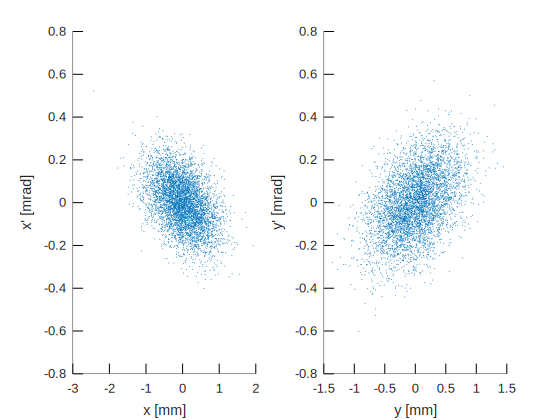

In [5]:
M0 = B0.get_phase_space ();
M0(1:10,:)

subplot(1,2,1)
scatter(M0(:,1), M0(:,2), 1, '.');
xlabel('x [mm]');
ylabel('x'' [mrad]');

subplot(1,2,2)
scatter(M0(:,3), M0(:,4), 1, '.');
xlabel('y [mm]');
ylabel('y'' [mrad]');

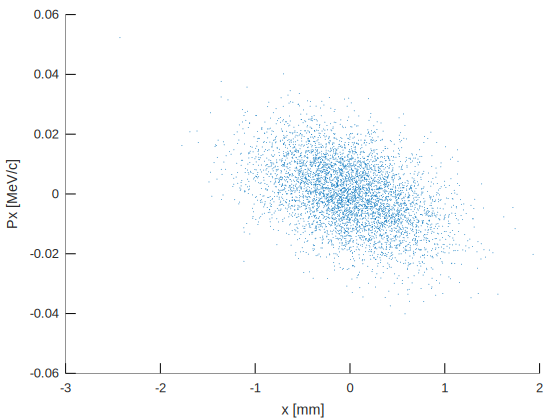

In [6]:
M = B0.get_phase_space('%x %Px');

figure;
scatter(M(:,1), M(:,2), 1, '.');
xlabel('x [mm]');
ylabel('Px [MeV/c]');


### Let's inquire the bunch properties

In [7]:
I0 = B0.get_info();
beta_x = I0.beta_x
beta_y = I0.beta_y
sigma_t = I0.sigma_t
sigma_pt = I0.sigma_pt

beta_x = 4.8526
beta_y = 2.9948
sigma_t = 0
sigma_pt = 0


# Intermezzo
### Pseudo-random vs. quasi-random numbers
Pseudo-random and quasi-random numbers are methods for generating sequences of seemingly random numbers, but they have different characteristics and purposes.

* Pseudo-random numbers are generated by algorithms called pseudo-random number generators (PRNGs). PRNGs start with an initial value called a seed and then use mathematical formulas or algorithms to generate a sequence of numbers that appears to be random.

* Quasi-random numbers (also known as low-discrepancy sequences or deterministic sequences) are noiseless distributions generated in a deterministic way, but they are designed to have better distribution properties than pseudo-random numbers.

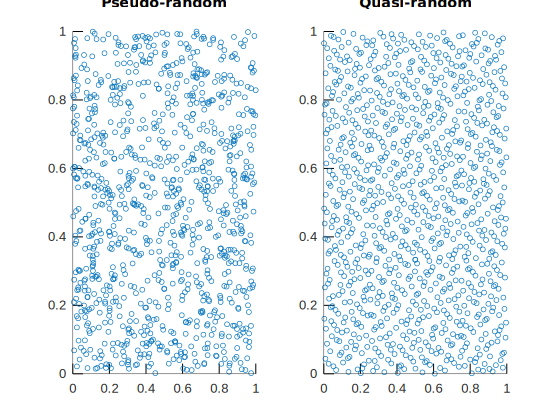

In [8]:
N = 1000;

PR = rand (N,2);  % Octave's pseudo-random numbers
QR = qrand (N,2); % RF-Track's quasi-random numbers

subplot(1,2,1);
scatter(PR(:,1), PR(:,2));
title('Pseudo-random');

subplot(1,2,2);
scatter(QR(:,1), QR(:,2));
title('Quasi-random');


RF-Track gives the possibility to create quasi-random bunches from the Twiss parameters

In [9]:
B0_QR = Bunch6d_QR (mass, 0.0, Q, P, Twiss, Nparticles);

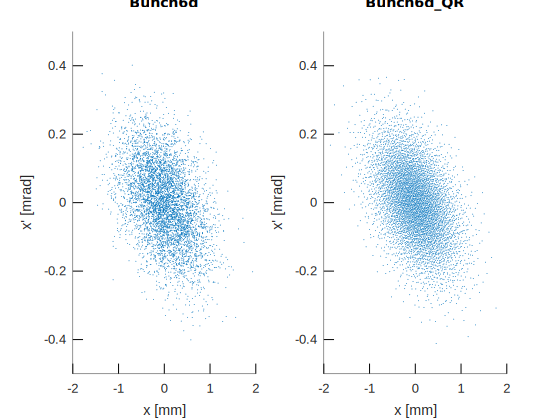

In [10]:
M0_QR = B0_QR.get_phase_space();

subplot(1,2,1)
scatter(M0(:,1), M0(:,2), 1, '.');
xlabel('x [mm]');
ylabel('x'' [mrad]');
axis([ -2 2 -0.5 0.5 ]);
title('Bunch6d');

subplot(1,2,2)
scatter(M0_QR(:,1), M0_QR(:,2), 1, '.');
xlabel('x [mm]');
ylabel('x'' [mrad]');
title('Bunch6d\_QR');
axis([ -2 2 -0.5 0.5 ]);

In [11]:
I0 = B0_QR.get_info();
beta_x = I0.beta_x
beta_y = I0.beta_y
sigma_t = I0.sigma_t
sigma_pt = I0.sigma_pt

beta_x = 5.0024
beta_y = 3.0003
sigma_t = 0
sigma_pt = 0
